# Project 1 : Write A Data Science Blog Post

## 1 - Business Understanding

For this project I'm interest in using <strong>Stack Overflow data from 2020</strong> te better understand the following questions :
 - As a developer, should I go to work in the Western World (e.g Europe, America, etc.) or go to wor in the Eastern World (e.g; China, India, ect.)?
 - What is the well pay salary difference between the Western and Eastern World ?
 - On which side of the the World (Western World or Eastern World) developer are satisfied with the job occupation ?
 - Between Western and Eastern programmers, which one search for more job opportunity ?

## 2 - Data Understanding

### a) Get all the relevant liobrairies

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

### b) Load the data

We provide first, a general view about our dataset. Like what kind of developer they are and where are they come from. 
We also want to have a quick view about their employment status and how the think about their salary.

In [2]:
# Read the data
data_set = pd.read_csv('survey_results_public.csv')

# View the first 10 rows content of the the data_set
data_set.head(50)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
8,9,I am a developer by profession,No,30.0,20,NaN,NaN,NaN,Tunisia,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js,jQuery,Just as welcome now as I felt last year,50.0,6,4
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4


In [3]:
df = pd.read_csv('survey_results_schema.csv')
df.head(60)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


### c) Get some information regarding our questions

In [4]:
# Define a function to display a bar chart
def view_bar_chart(data_set, column, title):
    '''
        View different bar chart with title
        
        Parameters:
            - data_set : our DataFrame
            - column : Column we want to show
            - title : Title of the chart
            
        Returns : None
    
    '''
    
    status_vals =  data_set[column].value_counts()
    (status_vals[:10]/data_set.shape[0]).plot(kind="bar");
    plt.title(title);

#### Get a pandas series of the counts for each " MainBranch " status

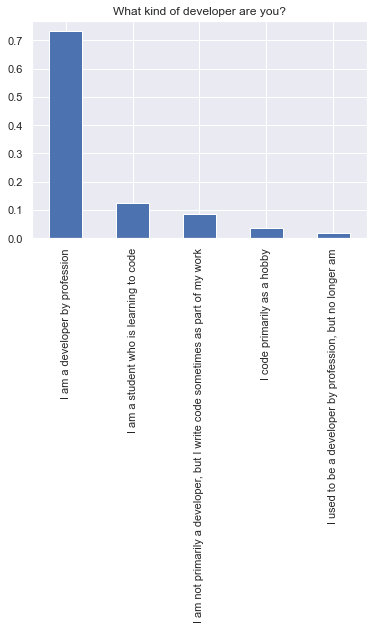

In [5]:
mainBranch_status = view_bar_chart(data_set, "MainBranch", "What kind of developer are you?")
mainBranch_status

#### Get a pandas serie of the counts for each " Country "

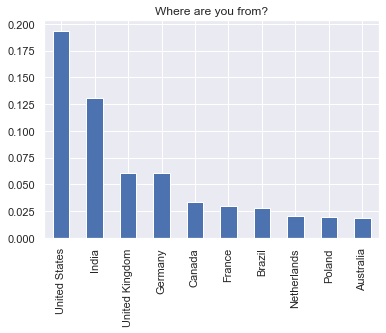

In [6]:
view_bar_chart(data_set, "Country", "Where are you from?")

#### Get a pandas serie of the counts for each " Employment "

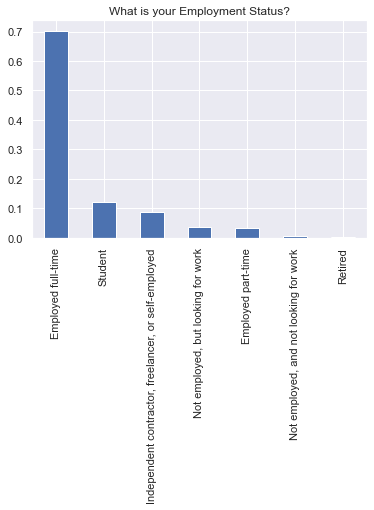

In [7]:
view_bar_chart(data_set, "Employment", "What is your Employment Status?")

#### Get a pandas serie of the counts for each " NEWJobHunt "

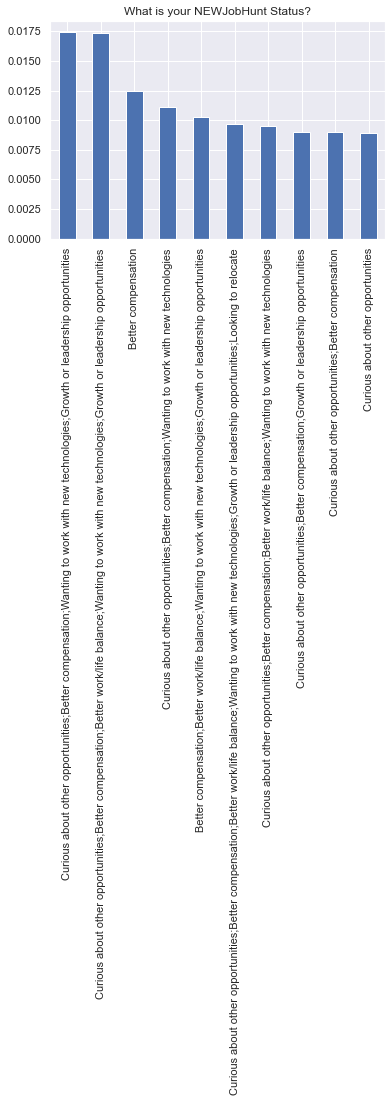

In [8]:
view_bar_chart(data_set, "NEWJobHunt", "What is your NEWJobHunt Status?")

#### Get a pandas serie of the counts for each " JobSeek " status

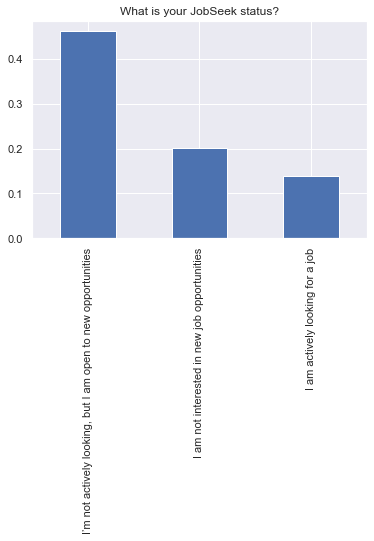

In [9]:
view_bar_chart(data_set, "JobSeek", "What is your JobSeek status?")

#### Get a pandas serie of the counts for each " JobSat " status

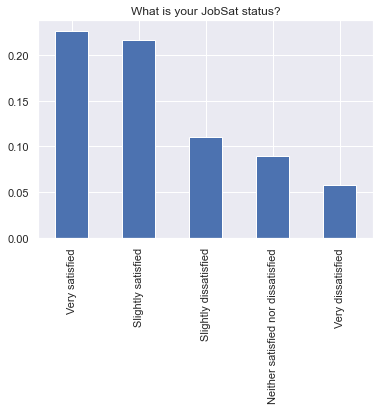

In [10]:
view_bar_chart(data_set, "JobSat", "What is your JobSat status?")

#### Get a pandas serie of the counts for each " JobFactors " status

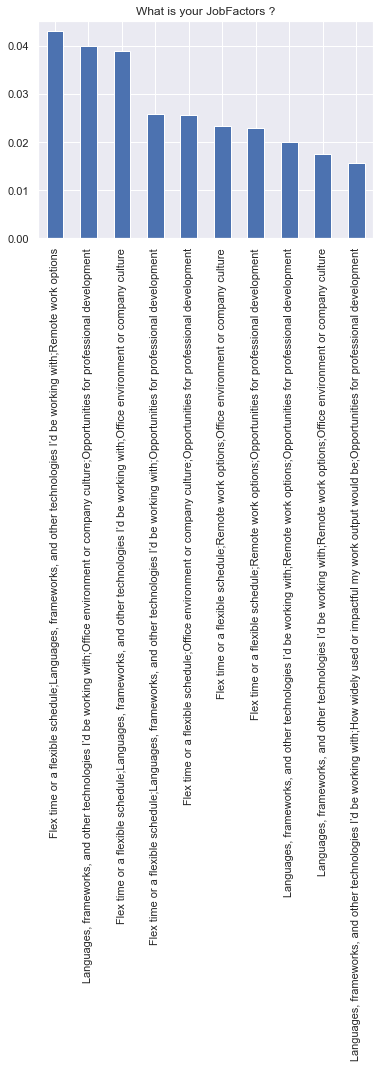

In [11]:
view_bar_chart(data_set, "JobFactors", "What is your JobFactors ?")

#### Get a pandas serie of the counts for each " UndergradMajor " status

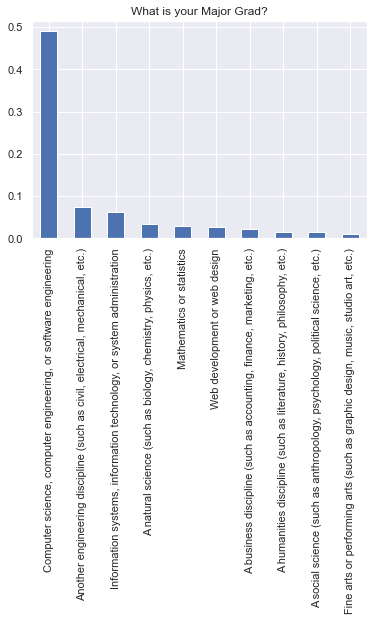

In [12]:
view_bar_chart(data_set, "UndergradMajor", "What is your Major Grad?")

#### Get a pandas serie of the counts for each " WebframeWorkedWith " status

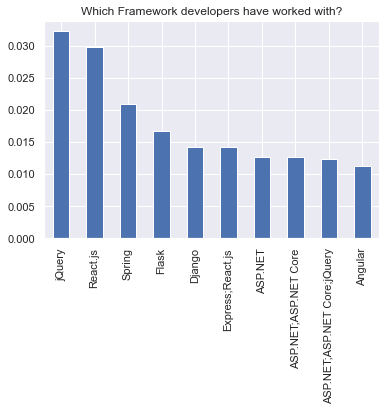

In [13]:
view_bar_chart(data_set, "WebframeWorkedWith", "Which Framework developers have worked with?")

#### Get a pandas serie of the counts for each " WebframeDesireNextYear " status

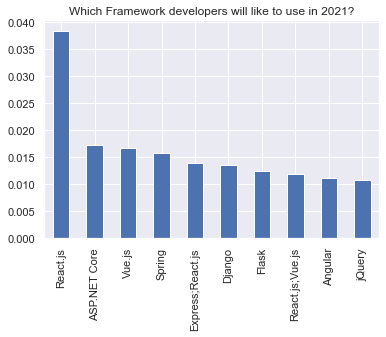

In [14]:
framework_will_use_status = view_bar_chart(data_set, "WebframeDesireNextYear", "Which Framework developers will like to use in 2021?")
framework_will_use_status

#### Get a pandas serie of the counts for each " Age1stCode " status

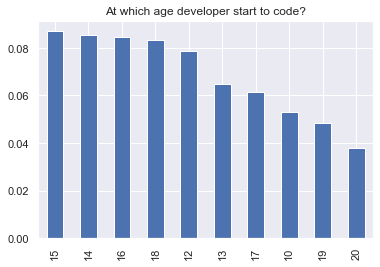

In [15]:
age1stCode_status = view_bar_chart(data_set, "Age1stCode", "At which age developer start to code?")
age1stCode_status

## 3 - Data Preparation

For categorical variables <strong>Country</strong>, we are going to seperate them into three sectors: <strong>Western, Eastern and Others</strong>. 
    The following code define the lists of related countries and create a new column to identify whether that person lives in the West or in the East.

In [16]:
def handling_country(data_set):
    '''
        Return a dataframe with country seperate into west and east
    
            - Parameters:
                - data_set: a raw data dataframe

        Returns:
        data_set_new: a dataframe with a new column west_or_east

    '''
    # For Categorical variables "Country", we seperate them into 
    # three sessions: western, eastern and other
    # The following lists define the countries to western and eastern
    western = ['United States', 'Liechtenstein', 'Switzerland', 
           'Iceland', 'Norway', 'Israel', 'Denmark', 
           'Ireland', 'Canada', 'United Kingdom', 'Germany', 
           'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland']

    eastern = ['Thailand', 'Singapore', 'Hong Kong', 
           'South Korea', 'Japan', 'China', 
           'Taiwan', 'Malaysia', 'India', 
           'Indonesia', 'Vietnam']
    
    #Add a new catagory seperating to western and eastern
    data_set['west_or_east'] = data_set['Country'].apply(lambda x: 'western' if x in western else ('eastern' if x in eastern else 'other'))
    
    return data_set

Here we select some useful columns for our analysis.

 - Country : Country they are living
 - Age1stCode : 
 - Employment : 
 - JobSat : 
 - JobSeek :
 - WorkWeekHrs : 
 - ConvertedComp : 
 - YearsCode : 
    
We especially focus on employed full-time professional developer.m

In [17]:
def data_preparation(data_set):
    '''
        Return useful columns with query condition
    
        Parameters:
            - data_set: a raw data dataframe

        Returns:
            - useful_data_set: a filtered dataframe with only useful columns
    
    '''
    
    # Get some useful columns for analysis
    useful_columns = ['Country', 'Age1stCode', 'Employment', 'JobSat', 'JobSeek', 'WorkWeekHrs', 'ConvertedComp', 'YearsCode', 'west_or_east', 'SurveyEase']
    useful_data_set = pd.DataFrame(data_set.query("MainBranch == 'I am a developer by profession' and (Gender == 'Man' or Gender == 'Woman') and Employment == 'Employed full-time'"))[useful_columns]
    
    return useful_data_set

In [18]:
# Get some useful columns fot analysis
data_set = handling_country(data_set)
useful_data_set = data_preparation(data_set)
useful_data_set

,Country,Age1stCode,Employment,JobSat,JobSeek,WorkWeekHrs,ConvertedComp,YearsCode,west_or_east,SurveyEase
5,Germany,14,Employed full-time,Slightly satisfied,I am not interested in new job opportunities,NaN,NaN,6,western,Neither easy nor difficult
7,United States,12,Employed full-time,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",39.0,116000.0,17,western,Easy
9,United Kingdom,14,Employed full-time,Very satisfied,"I’m not actively looking, but I am open to new...",36.0,32315.0,8,western,Easy
10,United Kingdom,13,Employed full-time,Slightly dissatisfied,I am actively looking for a job,40.0,40070.0,10,western,Easy
11,Spain,42,Employed full-time,Very dissatisfied,"I’m not actively looking, but I am open to new...",40.0,14268.0,7,western,Easy
...,...,...,...,...,...,...,...,...,...,...
63457,Colombia,13,Employed full-time,Slightly satisfied,"I’m not actively looking, but I am open to new...",43.0,7764.0,17,other,NaN
63517,France,13,Employed full-time,Very satisfied,I am not interested in new job opportunities,40.0,59454.0,20,western,Easy
63955,Mauritius,17,Employed full-time,Very satisfied,I am not interested in new job opportunities,40.0,9612.0,5,other,Difficult
64004,India,20,Employed full-time,Very satisfied,I am not interested in new job opportunities,NaN,NaN,4,eastern,NaN


For categorical variable <strong>JobSat</strong>, we transfer it to calculatable integer value because we want to find out the mean of their opinion. The following code will show the mapping.

In [19]:
def handling_JobSat(data_set):
    '''
        Convert JobSat from words to integer for calculating the mean
    
            Parameters:
                - data_set: a dataframe that will be converted

        Returns:
            dataframe: a converted dataframe with SurveyEase column becomes measurable
    
    '''
    JobSat_map = {
        'Very dissatisfied' : 1,
        'Slightly dissatisfied' : 2,
        'Neither satisfied nor dissatisfied' : 3,
        'Slightly satisfied' : 4,
        'Very satisfied' : 5,
        np.nan: np.nan
    }
    
    data_set['JobSat'] = data_set['JobSat'].apply(lambda x: np.nan if x == np.nan else JobSat_map[x])
    
    return data_set

Here we group the dataframe by <strong>west_or_east</strong> and <strong>YearsCode</strong>, and get their mean, it automatically ignore the missing or null value.

In [20]:
# Compare selected indicators between Western and Eastern
useful_data_set = handling_JobSat(useful_data_set)
comparison = useful_data_set.groupby(['west_or_east', 'YearsCode']).mean()
comparison.head(60)

JobSat  WorkWeekHrs  ConvertedComp
west_or_east YearsCode                                               
eastern      1                   3.461538    40.545455   14663.260870
             10                  3.348361    40.589165   25218.564815
             11                  3.204301    40.774286   49335.968254
             12                  3.380952    42.130137   57510.138158
             13                  3.411765    39.148361   53700.528090
             14                  3.218750    41.424779   51140.762500
             15                  3.490196    43.116788   39426.607843
             16                  3.238095    40.373494   54284.250000
             17                  3.678571    38.081633   83457.166667
             18                  3.460317    41.596491   48192.744681
             19                  3.370370    40.720000   44737.200000
             2                   3.450000    39.642857    8674.390625
             20                  3.387500    41.985915   80586.500000
             21                  3.125000    47.428571   45655.500000
             22                  3.705882    36.800000  103142.666667
             23                  3.461538    47.384615   53502.000000
             24                  3.375000    44.714286   43595.600000
             25                  3.619048    43.750000   52941.615385
             26                  3.700000    45.111111   65293.000000
             27                  3.222222    46.333333   35780.000000
             28                  2.400000    45.000000  205474.333333
             29                  3.500000    40.000000   55847.000000
             3                   3.317949    38.984663   13505.065041
             30                  3.300000    44.444444   60901.600000
             31                  1.500000    40.000000   35616.000000
             32                  4.000000    45.000000  134894.000000
             33                  3.000000    32.666667  479702.500000
             34                  3.000000    24.000000   43227.500000
             35                  2.500000    42.500000   89354.000000
             36                  4.000000    40.000000   37697.000000
             37                  3.333333    46.666667   93153.666667
             39                  4.000000    40.000000  152879.000000
             4                   3.363281    39.986486   25827.558282
             40                  3.000000    41.666667   64426.666667
             45                  5.000000          NaN            NaN
             5                   3.385965    38.587255   18195.906883
             6                   3.530184    39.425221   22588.775510
             7                   3.374101    39.520436   19554.504065
             8                   3.502591    39.302809   22697.313808
             9                   3.432950    40.335498   34959.471910
             Less than 1 year    2.875000    32.388889   12606.833333
             More than 50 years  4.333333          NaN            NaN
other        1                   3.540000    41.978723   11267.000000
             10                  3.426290    39.958869   36595.072727
             11                  3.486301    39.907801   36674.125506
             12                  3.614537    40.559908   39004.610811
             13                  3.434959    41.070539   40200.541284
             14                  3.541958    39.740000   44380.537500
             15                  3.541414    40.676221   45308.065491
             16                  3.559406    40.657216   54999.873563
             17                  3.550562    39.630814   86846.666667
             18                  3.393204    40.901515   70846.147929
             19                  3.524194    40.978814   91438.269231
             2                   3.639098    42.067460   13800.561905
             20                  3.414508    41.065934   69023.672026
             21                  3.333333    

For categorical variable <strong>JobSeek</strong>, we transfer it to calculatable integer value because we want to find out the mean of their opinion. The following code will show the mapping.

In [21]:
def handling_JobSeek(data_set):
    '''
        Convert JobSat from words to integer for calculating the mean
    
            Parameters:
                - data_set: a dataframe that will be converted

        Returns:
            dataframe: a converted dataframe with SurveyEase column becomes measurable
    
    '''
    JobSeek_map = {
        "I am not interested in new job opportunities" : 1,
        "I’m not actively looking, but I am open to new opportunities" : 2,
        "I am actively looking for a job" : 3,
        np.nan: np.nan
    }
    
    data_set['JobSeek'] = data_set['JobSeek'].apply(lambda x: np.nan if x == np.nan else JobSeek_map[x])
    
    return data_set

In [22]:
# Compare selected indaicators between Western and Eastern
useful_data_set = handling_JobSeek(useful_data_set)
comparison = useful_data_set.groupby(['west_or_east', 'YearsCode']).mean()
comparison.head(60)

JobSat   JobSeek  WorkWeekHrs  \
west_or_east YearsCode                                             
eastern      1                   3.461538  2.051282    40.545455   
             10                  3.348361  2.196319    40.589165   
             11                  3.204301  2.107527    40.774286   
             12                  3.380952  2.126984    42.130137   
             13                  3.411765  2.102190    39.148361   
             14                  3.218750  2.124031    41.424779   
             15                  3.490196  2.137255    43.116788   
             16                  3.238095  2.130952    40.373494   
             17                  3.678571  2.017857    38.081633   
             18                  3.460317  2.126984    41.596491   
             19                  3.370370  2.037037    40.720000   
             2                   3.450000  2.200000    39.642857   
             20                  3.387500  2.037500    41.985915   
             21                  3.125000  2.125000    47.428571   
             22                  3.705882  2.117647    36.800000   
             23                  3.461538  1.846154    47.384615   
             24                  3.375000  2.250000    44.714286   
             25                  3.619048  1.761905    43.750000   
             26                  3.700000  1.900000    45.111111   
             27                  3.222222  1.777778    46.333333   
             28                  2.400000  2.200000    45.000000   
             29                  3.500000  1.500000    40.000000   
             3                   3.317949  2.147959    38.984663   
             30                  3.300000  2.100000    44.444444   
             31                  1.500000  2.500000    40.000000   
             32                  4.000000  2.000000    45.000000   
             33                  3.000000  2.000000    32.666667   
             34                  3.000000  2.000000    24.000000   
             35                  2.500000  2.250000    42.500000   
             36                  4.000000  2.000000    40.000000   
             37                  3.333333  2.000000    46.666667   
             39                  4.000000  2.000000    40.000000   
             4                   3.363281  2.194553    39.986486   
             40                  3.000000  2.000000    41.666667   
             45                  5.000000  1.000000          NaN   
             5                   3.385965  2.164589    38.587255   
             6                   3.530184  2.130208    39.425221   
             7                   3.374101  2.167464    39.520436   
             8                   3.502591  2.175711    39.302809   
             9                   3.432950  2.160920    40.335498   
             Less than 1 year    2.875000  2.208333    32.388889   
             More than 50 years  4.333333  1.666667          NaN   
other        1                   3.540000  2.020000    41.978723   
             10                  3.426290  1.968137    39.958869   
             11                  3.486301  1.941980    39.907801   
             12                  3.614537  1.936264    40.559908   
             13                  3.434959  1.926829    41.070539   
             14                  3.541958  1.895105    39.740000   
             15                  3.541414  1.872727    40.676221   
             16                  3.559406  1.910891    40.657216   
             17                  3.550562  1.814607    39.630814   
             18                  3.393204  1.941748    40.901515   
             19                  3.524194  1.903226    40.978814   
             2                   3.639098  1.932836    42.067460   
             20                  3.414508  1.867876    41.065934   
             21                  3.333333  1.897727    43.023256   
             22                  3.537037  1.889908    42.023585   
             23        

For categorical variable <strong>SurveyEase</strong>, we transfer it to calculatable integer value because we want to find out the mean of their opinion. The following code will show the mapping.

In [23]:
def handling_SurveyEase(data_set):
    '''
        Convert SurveyEase from words to integer for calculating the mean
    
            Parameters:
                - data_set: a dataframe that will be converted

        Returns:
            dataframe: a converted dataframe with SurveyEase column becomes measurable
    
    '''
    surveyEase_map = {
        'Easy' : 1,
        'Neither easy nor difficult' : 2,
        'Difficult' : 3,
        np.nan: np.nan
    }
    
    data_set['SurveyEase'] = data_set['SurveyEase'].apply(lambda x: np.nan if x == np.nan else surveyEase_map[x])
    
    return data_set

In [24]:
# Compare selected indaicators between Western and Eastern
useful_data_set = handling_SurveyEase(useful_data_set)
comparison = useful_data_set.groupby(['west_or_east', 'YearsCode']).mean()
comparison.head(60)

JobSat   JobSeek  WorkWeekHrs  \
west_or_east YearsCode                                             
eastern      1                   3.461538  2.051282    40.545455   
             10                  3.348361  2.196319    40.589165   
             11                  3.204301  2.107527    40.774286   
             12                  3.380952  2.126984    42.130137   
             13                  3.411765  2.102190    39.148361   
             14                  3.218750  2.124031    41.424779   
             15                  3.490196  2.137255    43.116788   
             16                  3.238095  2.130952    40.373494   
             17                  3.678571  2.017857    38.081633   
             18                  3.460317  2.126984    41.596491   
             19                  3.370370  2.037037    40.720000   
             2                   3.450000  2.200000    39.642857   
             20                  3.387500  2.037500    41.985915   
             21                  3.125000  2.125000    47.428571   
             22                  3.705882  2.117647    36.800000   
             23                  3.461538  1.846154    47.384615   
             24                  3.375000  2.250000    44.714286   
             25                  3.619048  1.761905    43.750000   
             26                  3.700000  1.900000    45.111111   
             27                  3.222222  1.777778    46.333333   
             28                  2.400000  2.200000    45.000000   
             29                  3.500000  1.500000    40.000000   
             3                   3.317949  2.147959    38.984663   
             30                  3.300000  2.100000    44.444444   
             31                  1.500000  2.500000    40.000000   
             32                  4.000000  2.000000    45.000000   
             33                  3.000000  2.000000    32.666667   
             34                  3.000000  2.000000    24.000000   
             35                  2.500000  2.250000    42.500000   
             36                  4.000000  2.000000    40.000000   
             37                  3.333333  2.000000    46.666667   
             39                  4.000000  2.000000    40.000000   
             4                   3.363281  2.194553    39.986486   
             40                  3.000000  2.000000    41.666667   
             45                  5.000000  1.000000          NaN   
             5                   3.385965  2.164589    38.587255   
             6                   3.530184  2.130208    39.425221   
             7                   3.374101  2.167464    39.520436   
             8                   3.502591  2.175711    39.302809   
             9                   3.432950  2.160920    40.335498   
             Less than 1 year    2.875000  2.208333    32.388889   
             More than 50 years  4.333333  1.666667          NaN   
other        1                   3.540000  2.020000    41.978723   
             10                  3.426290  1.968137    39.958869   
             11                  3.486301  1.941980    39.907801   
             12                  3.614537  1.936264    40.559908   
             13                  3.434959  1.926829    41.070539   
             14                  3.541958  1.895105    39.740000   
             15                  3.541414  1.872727    40.676221   
             16                  3.559406  1.910891    40.657216   
             17                  3.550562  1.814607    39.630814   
             18                  3.393204  1.941748    40.901515   
             19                  3.524194  1.903226    40.978814   
             2                   3.639098  1.932836    42.067460   
             20                  3.414508  1.867876    41.065934   
             21                  3.333333  1.897727    43.023256   
             22                  3.537037  1.889908    42.023585   
             23        


For categorical variable YearsCode, we transfer it to calculatable integer value because we want to find out the mean of how long they have been coded. The following code shows the mapping.

In [25]:
def handling_YearsCode(data_set):
    """
        Convert the working year to integer for calculating the mean

        Parameters:
            - data_set: a dataframe that will be converted

        Returns:
            - dataframe: a converted dataframe with YearsCodedJob column becomes measurable
    
    """
    
    year_map = {
                'Less than 1 year' : 0,
                '1' : 1,
                '2' : 2,
                '3' : 3,
                '4' : 4,
                '5' : 5,
                '6' : 6,
                '7' : 7,
                '8' : 8,
                '9' : 9,
                '10' : 10,
                '11' : 11,
                '12' : 12,
                '13' : 13,
                '14' : 14,
                '15' : 15,
                '16' : 16,
                '17' : 17,
                '18' : 18,
                '19' : 19,
                '20' : 20,
                '21' : 21,
                '22' : 22,
                '23' : 23,
                '24' : 24,
                '25' : 25,
                '26' : 26,
                '27' : 27,
                '28' : 28,
                '29' : 29,
                '30' : 30,
                '31' : 31,
                '32' : 32,
                '33' : 33,
                '34' : 34,
                '35' : 35,
                '36' : 36,
                '37' : 37,
                '38' : 38,
                '39' : 39,
                '40' : 40,
                '41' : 41,
                '42' : 42,
                '43' : 43,
                '44' : 44,
                '45' : 45,
                '46' : 46,
                '47' : 47,
                '48' : 48,
                '49' : 49,
                '50' : 50,
                'More than 50 years' : 60
    }
    
    data_set_graph = data_set.reset_index()
    data_set_graph['YearsCode'] = data_set_graph['YearsCode'].apply(lambda x: year_map[x])
    data_set_graph['YearsCode'] = pd.to_numeric(data_set_graph['YearsCode'])
    
    return data_set_graph

In [26]:
comparison_graph = handling_YearsCode(comparison)
comparison_graph = comparison_graph.sort_values(by='YearsCode')
comparison_graph.set_index('YearsCode', inplace=True)

## 4 - Result Evaluation

In this section, we will display the findings and discuss about it.

Here you can see a programmer’s salary in the east is much lower than that in the west no matter how many years you are coding.

Text(0, 0.5, 'Average Salary converted to annual USD')

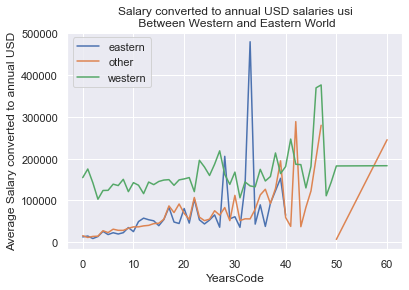

In [38]:
# plot the ConvertedComp (Salary converted to annual USD salaries using ) Comparison between Western World and Eastern World
comparison_graph.groupby('west_or_east')['ConvertedComp'].plot(legend=True)
plt.title("Salary converted to annual USD salaries usi\n Between Western and Eastern World");
plt.xlabel('YearsCode')
plt.ylabel('Average Salary converted to annual USD')

- We can see that in Western World (green graph), the annual salary increase depending on the number of years you are coding

- If we now look on the Eastern World (Blue graph), we can see a variation on the annual salary and that didn't increase depending the number of years you are coding;
  This can be explain due to the fact in Eastern World, depending in the country where you live, you can have higher or lower annual salary.
  Example someone living in "China" doesn't have the same annual salary than someone living in "India"  

Text(0, 0.5, 'SurveyEase')

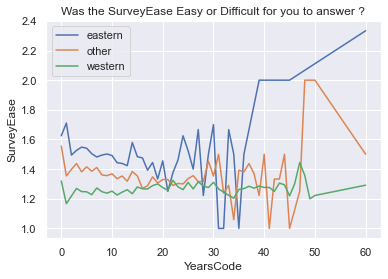

In [28]:
# Plot how the programmer thinks they SurveyEase was Easy or Difficult
comparison_graph.groupby('west_or_east')['SurveyEase'].plot(legend=True)
plt.title('Was the SurveyEase Easy or Difficult for you to answer ?')
plt.xlabel('YearsCode')
plt.ylabel('SurveyEase')

Text(0, 0.5, 'JobSat')

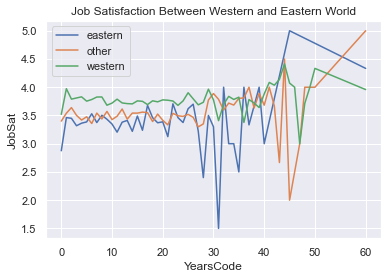

In [39]:
# plot the JobSat (Job Satisfaction) Comparison between Western World and Eastern World
comparison_graph.groupby('west_or_east')['JobSat'].plot(legend=True)
plt.title("Job Satisfaction Between Western and Eastern World");
plt.xlabel('YearsCode')
plt.ylabel('JobSat')

Text(0, 0.5, 'JobSeek')

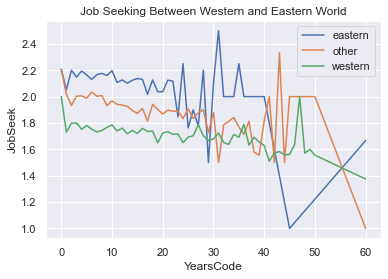

In [43]:
# plot the JobSeek (Job Seeking) Comparison between Western World and Eastern World
comparison_graph.groupby('west_or_east')['JobSeek'].plot(legend=True)
plt.title("Job Seeking Between Western and Eastern World");
plt.xlabel('YearsCode')
plt.ylabel('JobSeek')

In [29]:
# Comparison for Job Satisfaction betwwen Western and Eastern World
comparison.groupby('west_or_east').mean().JobSat

west_or_east
eastern    3.379955
other      3.578985
western    3.796866
Name: JobSat, dtype: float64

In [37]:
# Comparison for Job Seeking betwwen Western and Eastern World
comparison.groupby('west_or_east').mean().JobSeek

west_or_east
eastern    2.041448
other      1.865393
western    1.698491
Name: JobSeek, dtype: float64

In [30]:
# Comparison for WorkWeekHrs betwwen Western and Eastern World
comparison.groupby('west_or_east').mean().WorkWeekHrs

west_or_east
eastern    40.803174
other      41.748131
western    41.899899
Name: WorkWeekHrs, dtype: float64

In [31]:
# Comparison for ConvertedComp (Salary converted to annual USD salaries using ) betwwen Western and Eastern World
comparison.groupby('west_or_east').mean().ConvertedComp/50

west_or_east
eastern    1316.973580
other      1474.804846
western    3253.771401
Name: ConvertedComp, dtype: float64

Text(0, 0.5, 'Job Satisfaction')

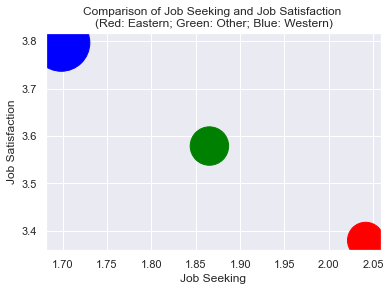

In [42]:
# Plot Comparison of Career and Job Satisfaction between Western and Eastern
plt.scatter(comparison.groupby('west_or_east').mean().JobSeek, comparison.groupby('west_or_east').mean().JobSat, comparison.groupby('west_or_east').mean().ConvertedComp/50, c=['red','green','blue'])

plt.title('Comparison of Job Seeking and Job Satisfaction \n(Red: Eastern; Green: Other; Blue: Western)')
plt.xlabel('Job Seeking')
plt.ylabel('Job Satisfaction')

- Here, we can see that Western programmers (blue ball) have a much higher satisfaction on their job and do not search for new job opportinities, see "blue ball" at the left-high-up corner. 

- Here, we can see that Eastern programmers (red ball) have a much lower satisfaction on their job and they search for new job opportinities. see "red ball" at the right-low-up corner.

- The "ball size" is an indicator about their average annual salary. 

- We can see that the "blue ball" size is much larger than the "red ball" (Eastern programmers average annual salary).

## 5 - Conclusion

- We compared the annual salary based on Years a programmer has been coded between the Eastern and the Western World. We found that the annual salary of a Western programmer is much higher than that of the Eastern programmer no matter how many years they are coded.

- We then looked at how different between the viewpoints that both West and East think if they are satisfied with their job. This showed that more Western programmers are satisfied with their job than the Eastern programmers no matter how many years they are coded.

- Finally, we found that regarding the "Job Satisfaction" and "Job Seeking", Western programmers score more in "Job Satisfaction" and doesn't really have the need to search for a new job opportunities than the Eastern programmers.